# Problem Statement : 

We need to classify the quality of Win

Pipeline of 
1. Data ingestion
2. EDA
3. PreProcessing
4. Model Building
5. Evaluation of the Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading Winequality dataset

df =pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Remarks
1. It is multiclassification dataset for quality of wine
2. There are total 6 type of Wine quality

In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

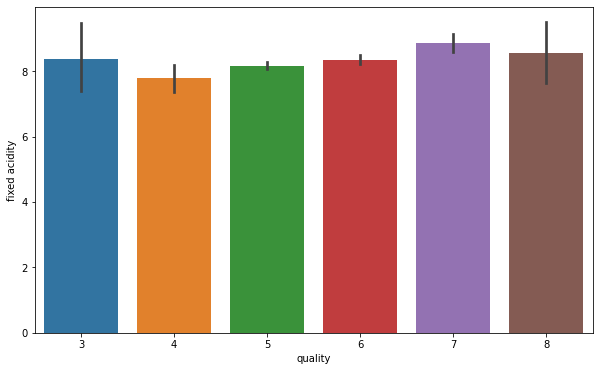

In [9]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

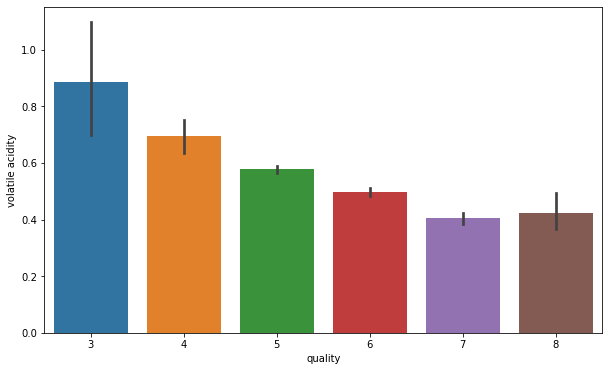

In [10]:
#Here we see that quality increaases as Volatile acidity decreases.

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

# Independent Features and Dependent Features
 

In [11]:
# storing all Independent features in X  except Quality
# it will be in dataframe format
X = df.iloc[:,:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
# storing all dependent feature in y which is  Quality
#it will be in series format
y = df.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

# Splitting the dataset into Training and Test dataset


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Training dataset which will be used to train our model is stored in X_train and y_train
# Testing dataset which will be used to test our data or to get the score of the data, is stored in X_test and y_test

# test_size = 33% of data will be splitted and stored in test data
# random_state = it gives randomness of selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [15]:
# getting dimension of X train
X_train.shape

(1071, 11)

# Transforming the Train Data

1. Machine learning algorithms work better or converge faster  when features are on a relatively similar scale and close to normally distributed.

2. Scale means to change the range of the values. The shape of the distribution doesn’t change.

3. StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.  Unit variance means dividing all the values by the standard deviation. 

4. StandardScaler makes the mean of the distribution approximately 0.

5. StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.



In [16]:
#Standardization is necessary or features might behave badly if the individual features do not more or less look like 
#standard normally distributed data: Gaussian with zero mean and unit variance.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
scaler.fit(X_train) # calculate the mean and Standard Deviation

StandardScaler()

In [18]:
print(scaler.mean_)

[ 8.34920635  0.52628385  0.2754155   2.58225957  0.0897479  16.07656396
 47.20074697  0.99683377  3.30894491  0.66496732 10.38215064]


In [19]:
scaler.transform(X_train)

array([[ 0.48509824, -0.03513851,  3.72747792, ..., -3.67945073,
         7.24826008, -0.93540053],
       [ 1.22632112, -0.09105729,  1.87553098, ..., -1.41594906,
        -0.02696895,  1.35036011],
       [-0.02805606,  0.49608995, -0.28507379, ..., -0.31653397,
        -0.29843272, -1.03064055],
       ...,
       [-0.76927893, -0.8180015 ,  1.10388642, ...,  0.52419522,
         0.57025134,  0.9694    ],
       [ 0.9412354 , -0.98575786,  1.00100048, ..., -0.5105484 ,
        -0.78706751,  1.54084016],
       [-0.76927893,  0.41221177,  0.12646997, ..., -0.05784806,
         2.7419615 , -0.17348032]])

In [20]:
X_train_tf= scaler.fit_transform(X_train) # calculate the mean and Standard Deviation
X_train_tf

array([[ 0.48509824, -0.03513851,  3.72747792, ..., -3.67945073,
         7.24826008, -0.93540053],
       [ 1.22632112, -0.09105729,  1.87553098, ..., -1.41594906,
        -0.02696895,  1.35036011],
       [-0.02805606,  0.49608995, -0.28507379, ..., -0.31653397,
        -0.29843272, -1.03064055],
       ...,
       [-0.76927893, -0.8180015 ,  1.10388642, ...,  0.52419522,
         0.57025134,  0.9694    ],
       [ 0.9412354 , -0.98575786,  1.00100048, ..., -0.5105484 ,
        -0.78706751,  1.54084016],
       [-0.76927893,  0.41221177,  0.12646997, ..., -0.05784806,
         2.7419615 , -0.17348032]])

In [21]:
X_test_tf= scaler.transform(X_test) # Transforming the test data
X_test_tf

array([[-0.54121035, -0.31473244,  0.94955751, ...,  0.07149489,
        -0.18984721,  0.11223976],
       [-0.54121035,  1.19507477, -1.05671835, ..., -1.22193464,
        -1.00423852, -0.36396037],
       [ 3.3929726 , -1.209433  ,  2.38996068, ..., -2.90339302,
         0.67883685, -1.88780079],
       ...,
       [ 3.05086974, -0.62228575,  2.08130286, ..., -1.60996349,
         0.73312961, -0.36396037],
       [-0.48419321,  1.11119659, -1.21104726, ..., -0.31653397,
        -0.73277475, -0.74492048],
       [-0.65524464,  0.52404934, -1.10816132, ...,  1.30025294,
        -0.678482  , -0.8401605 ]])

#   Building the SVC Model

In [22]:
from sklearn.svm import SVC
svc_model =SVC()

In [23]:
svc_model.fit(X_train_tf,y_train)

SVC()

In [24]:
train_score = svc_model.score(X_train_tf,y_train)
print(f"Model score : {'{:.2%}'.format(train_score)}")

Model score : 68.07%


In [25]:
y_predict= svc_model.predict(X_test_tf)

In [26]:
y_test

1518    5
1246    5
544     6
1343    6
428     5
       ..
774     6
1150    7
381     6
1500    5
860     5
Name: quality, Length: 528, dtype: int64

### Checking the accuracy score
1. In multilabel classification, accuracy_score function computes subset accuracy.
2. The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
test_accuracy = accuracy_score(y_test,y_predict)

In [29]:
print(f"Model Test accuracy score : {'{:.2%}'.format(test_accuracy)}")

Model Test accuracy score : 60.80%


### Using Grid Search CV evaluation technique to optimize the model performance.
1. GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

In [32]:
from sklearn.model_selection import GridSearchCV
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7]
}
grid_svc = GridSearchCV(svc_model, param_grid=param, scoring='accuracy', cv=10)

In [33]:
grid_svc.fit(X_train, y_train)

C:\Users\Ravi0dubey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
                               1.7],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5,
                                   1.6, 1.7],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
#Best parameters for our svc model
grid_svc.best_params_

In [ ]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

# Building the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tf,y_train)

In [ ]:
logistic_train_score = logistic_model.score(X_train_tf,y_train)
print(f"Model score : {'{:.2%}'.format(logistic_train_score)}")

In [ ]:
y_predict= logistic_model.predict(X_test_tf)

In [ ]:
logistic_test_accuracy = accuracy_score(y_test,y_predict)
print(f"Logistic Model Test accuracy score : {'{:.2%}'.format(logistic_test_accuracy)}")

# Task for Tomorrow

1. Increase the Accuracy of the SVC model(Wine quality Dataset), using Hyper Parameter Tuning(Gridsearch CV) (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
3. Use SVR on Admission Prediction (https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv